<a href="https://www.kaggle.com/code/bhanupratapbiswas/hr-analytics?scriptVersionId=134513908" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-analytics-case-study/hranalytics/WA_Fn-UseC_-HR-Employee-Attrition.csv


In [2]:
df = pd.read_csv("/kaggle/input/hr-analytics-case-study/hranalytics/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
df.rename(columns = {'BusinessTravel':'Business Travel','DailyRate':'Daily Rate','DistanceFromHome':'Distance From Home'},inplace=True)

In [6]:
df.head(2)

,Age,Attrition,Business Travel,Daily Rate,Department,Distance From Home,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


In [7]:
df.rename(columns={'EducationField':'Education Field','EmployeeCount':'Employee Count','EmployeeNumber':'Employee Number','EnvironmentSatisfaction':'Environment Satisfaction'},inplace=True)

In [8]:
df.head(2).transpose()

,0,1
Age,41,49
Attrition,Yes,No
Business Travel,Travel_Rarely,Travel_Frequently
Daily Rate,1102,279
Department,Sales,Research & Development
Distance From Home,1,8
Education,2,1
Education Field,Life Sciences,Life Sciences
Employee Count,1,1
Employee Number,1,2


In [9]:
df.rename(columns={'HourlyRate':'Hourly Rate','JobInvolvement':'Job Involvement','MaritalStatus':'Marital Status','MonthlyIncome':'Monthly Income','MonthlyRate':'Monthly Rate','NumCompaniesWorked':'Num Companies Worked','Over18':'Over 18','OverTime':'Over Time','PercentSalaryHike':'Percent Salary Hike','PerformanceRating':'Performance Rating','RelationshipSatisfaction':'Relationship Satisfaction','StandardHours':'Standard Hours','StockOptionLevel':'Stock Option Level','TotalWorkingYears':'Total Working Years'},inplace=True)

In [10]:
df.head(2).transpose()

,0,1
Age,41,49
Attrition,Yes,No
Business Travel,Travel_Rarely,Travel_Frequently
Daily Rate,1102,279
Department,Sales,Research & Development
Distance From Home,1,8
Education,2,1
Education Field,Life Sciences,Life Sciences
Employee Count,1,1
Employee Number,1,2


In [11]:
df.rename(columns={'TrainingTimesLastYear':'Training Times Last Year','WorkLifeBalance':'Work Life Balance','YearsAtCompany':'Years At Company','YearsInCurrentRole':'Years In Current Role','YearsSinceLastPromotion':'Years Since Last Promotion','YearsWithCurrManager':'Years With Curr Manager','JobLevel':'Job Level','JobRole':'Job Role','JobSatisfaction':'Job Satisfaction'},inplace=True)

In [12]:
df.head(2).transpose()

,0,1
Age,41,49
Attrition,Yes,No
Business Travel,Travel_Rarely,Travel_Frequently
Daily Rate,1102,279
Department,Sales,Research & Development
Distance From Home,1,8
Education,2,1
Education Field,Life Sciences,Life Sciences
Employee Count,1,1
Employee Number,1,2


In [13]:
df.shape

(1470, 35)

In [14]:
df.index

RangeIndex(start=0, stop=1470, step=1)

In [15]:
df.dtypes

Age                            int64
Attrition                     object
Business Travel               object
Daily Rate                     int64
Department                    object
Distance From Home             int64
Education                      int64
Education Field               object
Employee Count                 int64
Employee Number                int64
Environment Satisfaction       int64
Gender                        object
Hourly Rate                    int64
Job Involvement                int64
Job Level                      int64
Job Role                      object
Job Satisfaction               int64
Marital Status                object
Monthly Income                 int64
Monthly Rate                   int64
Num Companies Worked           int64
Over 18                       object
Over Time                     object
Percent Salary Hike            int64
Performance Rating             int64
Relationship Satisfaction      int64
Standard Hours                 int64
S

In [16]:
df.groupby('Gender').get_group('Female').transpose()

,0,3,6,11,15,18,20,22,25,26,...,1446,1450,1451,1453,1454,1457,1458,1460,1462,1464
Age,41,33,59,29,29,53,24,34,53,32,...,34,35,38,36,45,40,35,29,39,26
Attrition,Yes,No,No,No,No,No,No,No,No,Yes,...,No,No,No,No,No,No,No,No,No,No
Business Travel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Non-Travel,Travel_Rarely,Travel_Rarely,Travel_Frequently,...,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely
Daily Rate,1102,1392,1324,153,1389,1219,673,419,1282,1125,...,704,1146,345,1120,374,1194,287,468,722,1167
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development,Sales,Research & Development,Research & Development,Research & Development,Research & Development,...,Sales,Human Resources,Sales,Sales,Sales,Research & Development,Research & Development,Research & Development,Sales,Sales
Distance From Home,1,3,3,15,21,2,11,7,5,16,...,28,26,10,11,20,2,1,28,24,5
Education,2,4,3,2,4,4,2,4,3,1,...,3,4,2,4,3,4,4,4,1,3
Education Field,Life Sciences,Life Sciences,Medical,Life Sciences,Life Sciences,Life Sciences,Other,Life Sciences,Other,Life Sciences,...,Marketing,Life Sciences,Life Sciences,Marketing,Life Sciences,Medical,Life Sciences,Medical,Marketing,Other
Employee Count,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Employee Number,1,5,10,15,20,23,26,28,32,33,...,2035,2040,2041,2045,2046,2051,2052,2054,2056,2060


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         1470 non-null   int64 
 1   Attrition                   1470 non-null   object
 2   Business Travel             1470 non-null   object
 3   Daily Rate                  1470 non-null   int64 
 4   Department                  1470 non-null   object
 5   Distance From Home          1470 non-null   int64 
 6   Education                   1470 non-null   int64 
 7   Education Field             1470 non-null   object
 8   Employee Count              1470 non-null   int64 
 9   Employee Number             1470 non-null   int64 
 10  Environment Satisfaction    1470 non-null   int64 
 11  Gender                      1470 non-null   object
 12  Hourly Rate                 1470 non-null   int64 
 13  Job Involvement             1470 non-null   int6

In [18]:
df[df['Marital Status']=='Single'].transpose()

,0,2,5,8,11,14,19,21,22,23,...,1435,1436,1437,1449,1450,1454,1455,1460,1463,1464
Age,41,37,32,38,29,28,38,36,34,21,...,44,21,39,32,35,45,40,29,31,26
Attrition,Yes,Yes,No,No,No,Yes,No,Yes,No,No,...,No,No,No,No,No,No,No,No,No,No
Business Travel,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,...,Travel_Rarely,Travel_Rarely,Non-Travel,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Non-Travel,Travel_Rarely
Daily Rate,1102,1373,1005,216,153,103,371,1218,419,391,...,1037,501,105,529,1146,374,1322,468,325,1167
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Sales,Research & Development,Research & Development,...,Research & Development,Sales,Research & Development,Research & Development,Human Resources,Sales,Research & Development,Research & Development,Research & Development,Sales
Distance From Home,1,2,2,23,15,24,2,9,7,15,...,1,5,9,2,26,20,2,28,5,5
Education,2,2,2,3,2,3,3,4,4,2,...,3,1,3,3,4,3,4,4,3,3
Education Field,Life Sciences,Other,Life Sciences,Life Sciences,Life Sciences,Life Sciences,Life Sciences,Life Sciences,Life Sciences,Life Sciences,...,Medical,Medical,Life Sciences,Technical Degree,Life Sciences,Life Sciences,Life Sciences,Medical,Medical,Other
Employee Count,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Employee Number,1,4,8,12,15,19,24,27,28,30,...,2020,2021,2022,2038,2040,2046,2048,2054,2057,2060


In [19]:
df[df['Monthly Income']>5993].transpose()

,8,15,18,22,25,27,28,29,31,43,...,1446,1448,1450,1452,1453,1461,1462,1463,1466,1467
Age,38,29,53,34,53,42,44,46,44,27,...,34,41,35,50,36,50,39,31,39,27
Attrition,No,No,No,No,No,No,No,No,No,No,...,No,No,No,Yes,No,Yes,No,No,No,No
Business Travel,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Frequently,...,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Rarely,Non-Travel,Travel_Rarely,Travel_Rarely
Daily Rate,216,1389,1219,419,1282,691,477,705,1459,994,...,704,930,1146,878,1120,410,722,325,613,155
Department,Research & Development,Research & Development,Sales,Research & Development,Research & Development,Sales,Research & Development,Sales,Research & Development,Sales,...,Sales,Sales,Human Resources,Sales,Sales,Sales,Sales,Research & Development,Research & Development,Research & Development
Distance From Home,23,21,2,7,5,8,7,2,10,8,...,28,3,26,1,11,28,24,5,6,4
Education,3,4,4,4,3,4,4,4,4,3,...,3,3,4,4,4,3,1,3,1,3
Education Field,Life Sciences,Life Sciences,Life Sciences,Life Sciences,Other,Marketing,Medical,Marketing,Other,Life Sciences,...,Marketing,Life Sciences,Life Sciences,Life Sciences,Marketing,Marketing,Marketing,Medical,Medical,Life Sciences
Employee Count,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Employee Number,12,20,23,28,32,35,36,38,40,56,...,2035,2037,2040,2044,2045,2055,2056,2057,2062,2064


# Data Exploration

In [20]:
# Display the first few rows of the dataset
df.head(2)

,Age,Attrition,Business Travel,Daily Rate,Department,Distance From Home,Education,Education Field,Employee Count,Employee Number,...,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Training Times Last Year,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


In [21]:
# Check the dimensions of the dataset
df.shape

(1470, 35)

In [22]:
 #Check the data types of each column
df.dtypes

Age                            int64
Attrition                     object
Business Travel               object
Daily Rate                     int64
Department                    object
Distance From Home             int64
Education                      int64
Education Field               object
Employee Count                 int64
Employee Number                int64
Environment Satisfaction       int64
Gender                        object
Hourly Rate                    int64
Job Involvement                int64
Job Level                      int64
Job Role                      object
Job Satisfaction               int64
Marital Status                object
Monthly Income                 int64
Monthly Rate                   int64
Num Companies Worked           int64
Over 18                       object
Over Time                     object
Percent Salary Hike            int64
Performance Rating             int64
Relationship Satisfaction      int64
Standard Hours                 int64
S

In [23]:
# Check for missing values
df.isnull().sum()

Age                           0
Attrition                     0
Business Travel               0
Daily Rate                    0
Department                    0
Distance From Home            0
Education                     0
Education Field               0
Employee Count                0
Employee Number               0
Environment Satisfaction      0
Gender                        0
Hourly Rate                   0
Job Involvement               0
Job Level                     0
Job Role                      0
Job Satisfaction              0
Marital Status                0
Monthly Income                0
Monthly Rate                  0
Num Companies Worked          0
Over 18                       0
Over Time                     0
Percent Salary Hike           0
Performance Rating            0
Relationship Satisfaction     0
Standard Hours                0
Stock Option Level            0
Total Working Years           0
Training Times Last Year      0
Work Life Balance             0
Years At

In [24]:
# Statistical summary of numerical columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
Daily Rate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
Distance From Home,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
Employee Count,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
Employee Number,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
Environment Satisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
Hourly Rate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
Job Involvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
Job Level,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


# Data Preprocessing

In [25]:
# Handling missing values (if any)
df.fillna(value=df.mean(), inplace=True)  # Filling missing numerical values with mean

# Encoding categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Using LabelEncoder to convert categorical variables to numerical labels
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Check the preprocessed data
df.head()

/tmp/ipykernel_20/916233062.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(value=df.mean(), inplace=True)  # Filling missing numerical values with mean


,Age,Attrition,Business Travel,Daily Rate,Department,Distance From Home,Education,Education Field,Employee Count,Employee Number,...,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Training Times Last Year,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


# Feature Selection

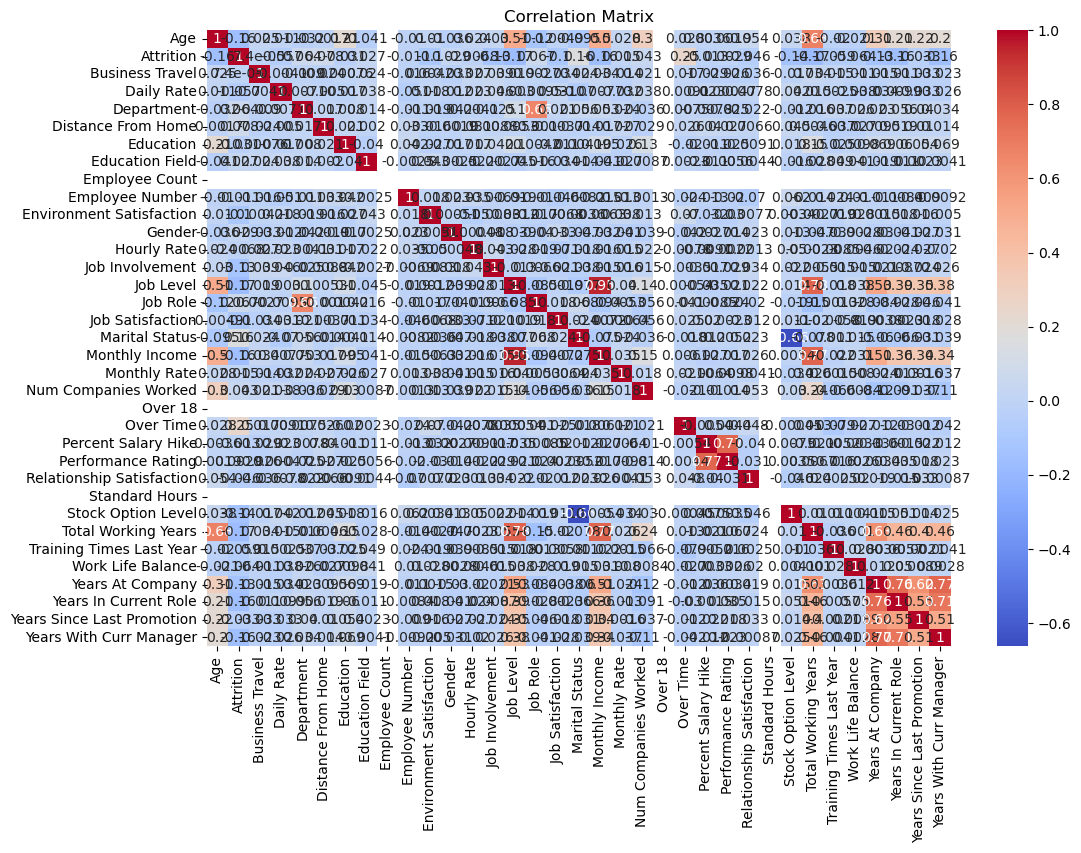

In [26]:
corr_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Data Visualization

In [27]:
df.columns

Index(['Age', 'Attrition', 'Business Travel', 'Daily Rate', 'Department',
       'Distance From Home', 'Education', 'Education Field', 'Employee Count',
       'Employee Number', 'Environment Satisfaction', 'Gender', 'Hourly Rate',
       'Job Involvement', 'Job Level', 'Job Role', 'Job Satisfaction',
       'Marital Status', 'Monthly Income', 'Monthly Rate',
       'Num Companies Worked', 'Over 18', 'Over Time', 'Percent Salary Hike',
       'Performance Rating', 'Relationship Satisfaction', 'Standard Hours',
       'Stock Option Level', 'Total Working Years', 'Training Times Last Year',
       'Work Life Balance', 'Years At Company', 'Years In Current Role',
       'Years Since Last Promotion', 'Years With Curr Manager'],
      dtype='object')

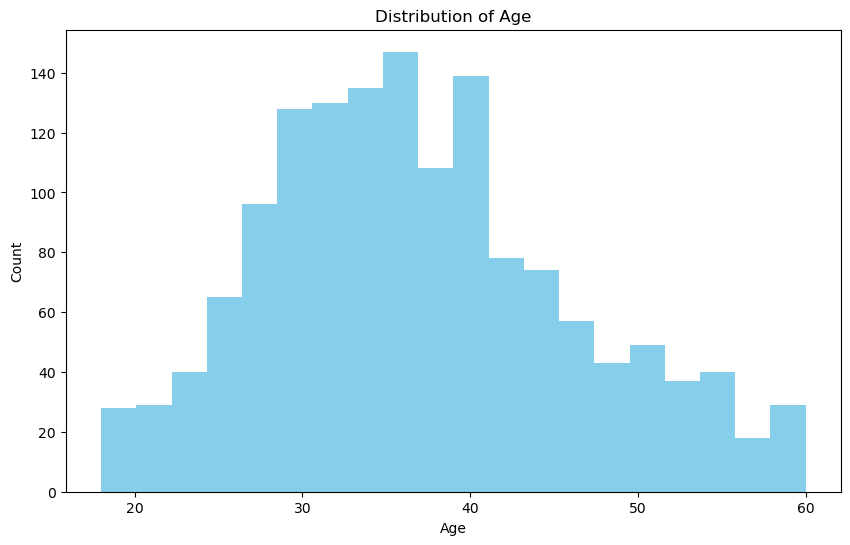

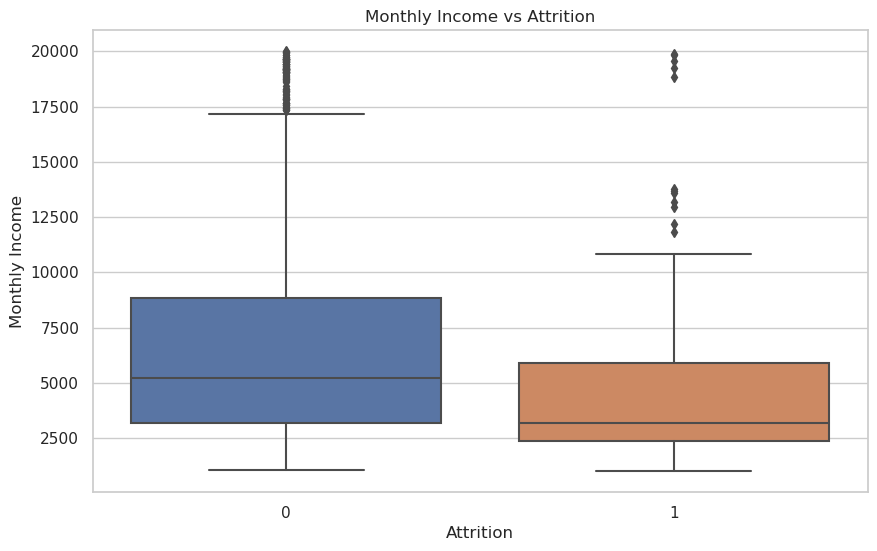

In [28]:
# Plotting with Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

# Plotting with Seaborn
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='Monthly Income', data=df)
plt.title('Monthly Income vs Attrition')
plt.show()

# Plotting with Plotly
fig = px.scatter(df, x='Years At Company', y='Total Working Years', color='Department')
fig.update_layout(title='Years at Company vs Total Working Years', xaxis_title='Years At Company', yaxis_title='Total Working Years')
fig.show()

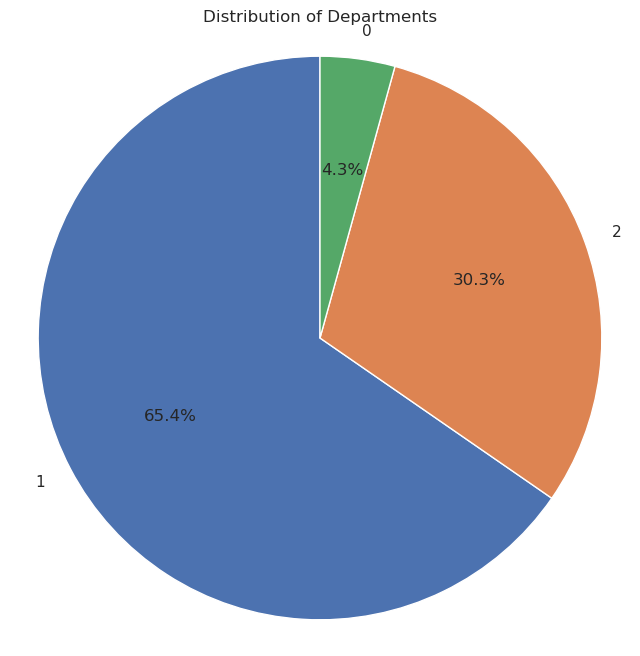

In [29]:
# Count the occurrences of each department
department_counts = df['Department'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Departments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

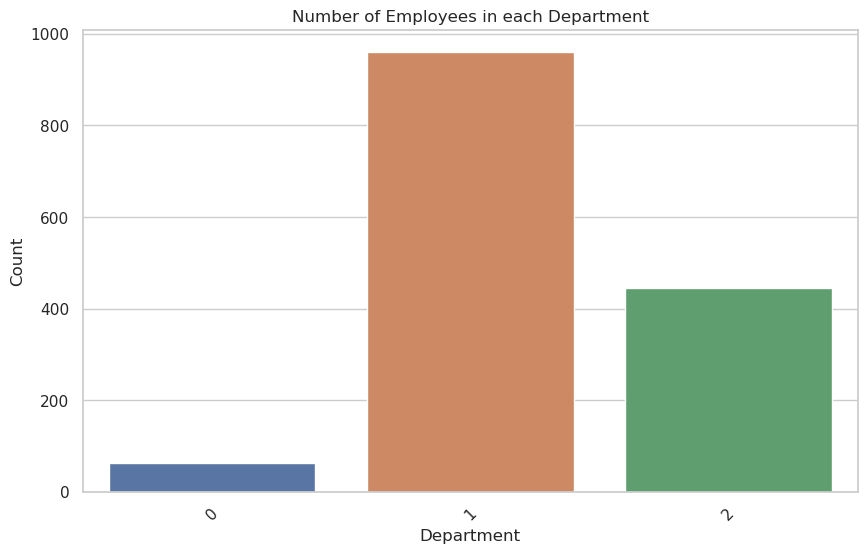

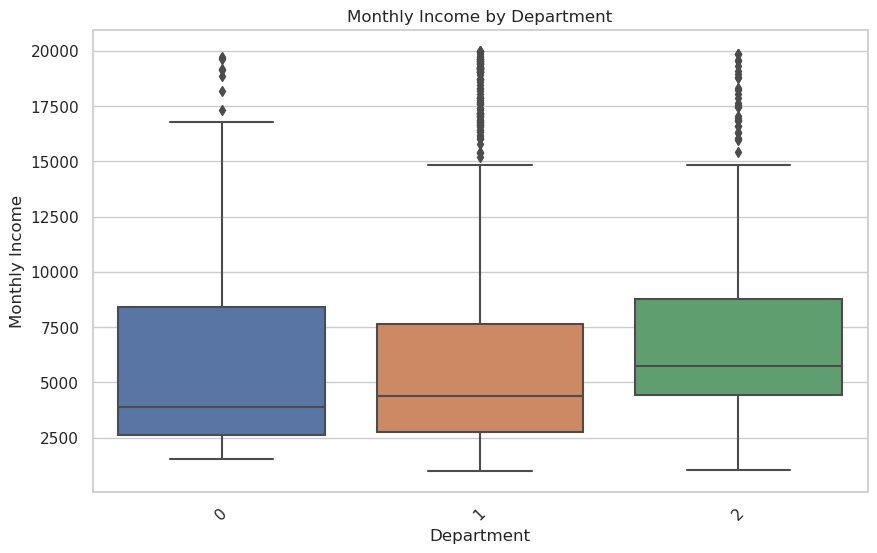

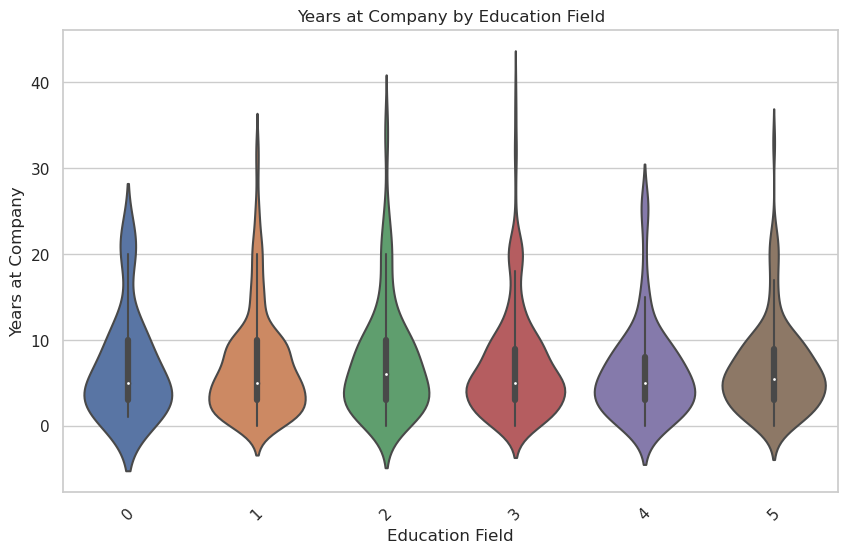

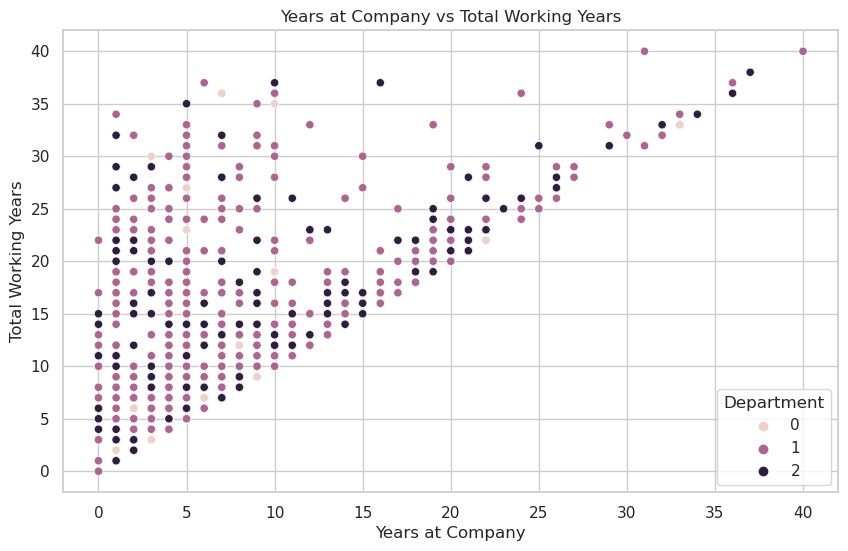

In [30]:
# 1. Bar Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', data=df)
plt.title('Number of Employees in each Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 2. Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department', y='Monthly Income', data=df)
plt.title('Monthly Income by Department')
plt.xlabel('Department')
plt.ylabel('Monthly Income')
plt.xticks(rotation=45)
plt.show()

# 3. Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Education Field', y='Years At Company', data=df)
plt.title('Years at Company by Education Field')
plt.xlabel('Education Field')
plt.ylabel('Years at Company')
plt.xticks(rotation=45)
plt.show()

# 4. Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Years At Company', y='Total Working Years', data=df, hue='Department')
plt.title('Years at Company vs Total Working Years')
plt.xlabel('Years at Company')
plt.ylabel('Total Working Years')
plt.legend(title='Department')
plt.show()

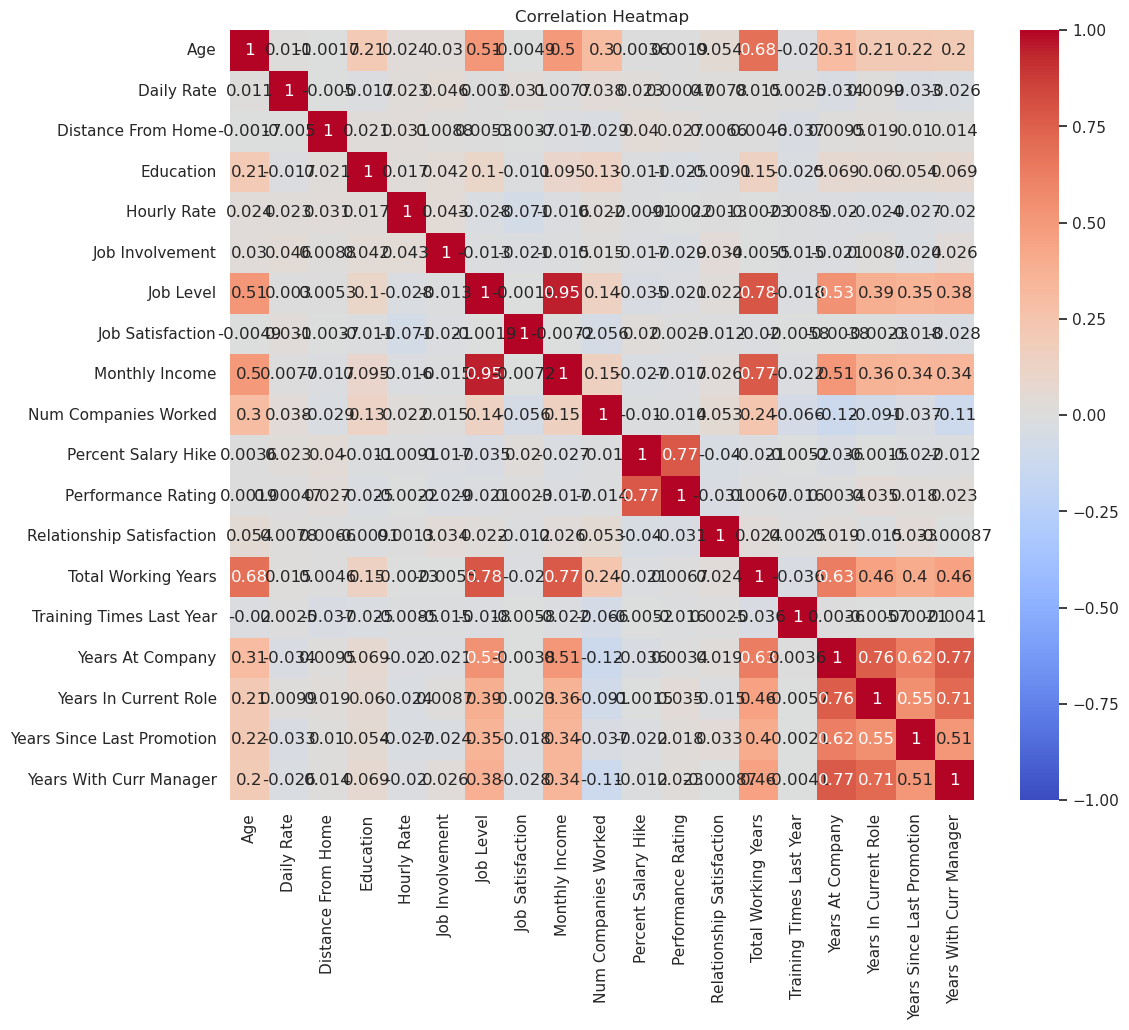

In [31]:
columns_for_heatmap = ['Age', 'Daily Rate', 'Distance From Home', 'Education', 'Hourly Rate',
                       'Job Involvement', 'Job Level', 'Job Satisfaction', 'Monthly Income',
                       'Num Companies Worked', 'Percent Salary Hike', 'Performance Rating',
                       'Relationship Satisfaction', 'Total Working Years', 'Training Times Last Year',
                       'Years At Company', 'Years In Current Role', 'Years Since Last Promotion',
                       'Years With Curr Manager']

# Create a correlation matrix
corr_matrix = df[columns_for_heatmap].corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

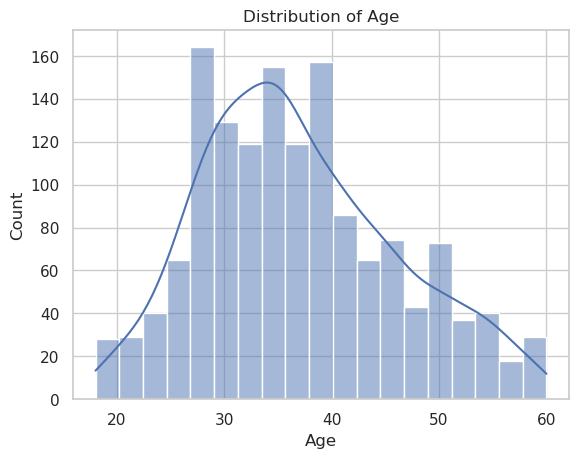

In [32]:
import seaborn as sns

# Create a distribution plot
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


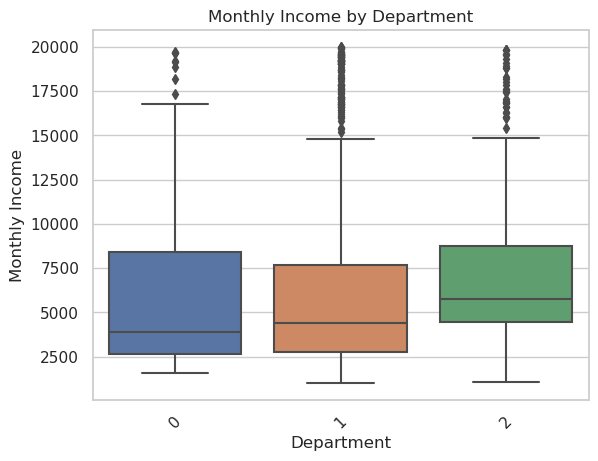

In [33]:
import seaborn as sns

# Create a box plot
sns.boxplot(x='Department', y='Monthly Income', data=df)
plt.title('Monthly Income by Department')
plt.xlabel('Department')
plt.ylabel('Monthly Income')
plt.xticks(rotation=45)
plt.show()


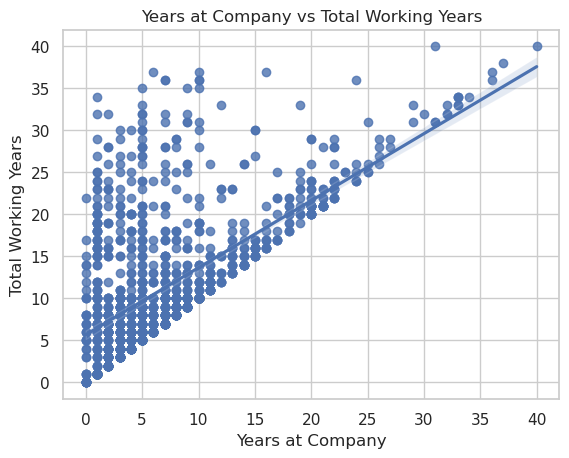

In [34]:
import seaborn as sns

# Create a scatter plot with regression line
sns.regplot(x='Years At Company', y='Total Working Years', data=df)
plt.title('Years at Company vs Total Working Years')
plt.xlabel('Years at Company')
plt.ylabel('Total Working Years')
plt.show()


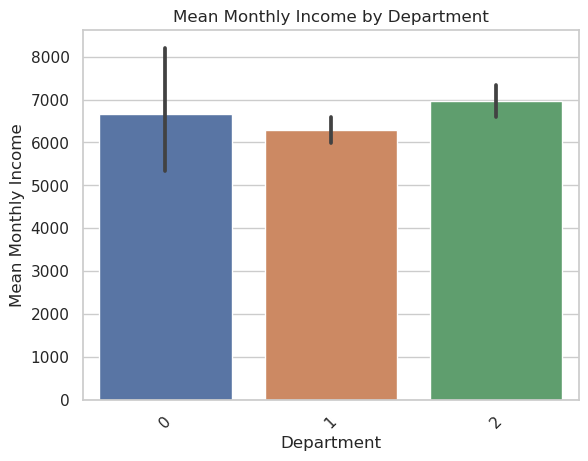

In [35]:
import seaborn as sns

# Create a bar plot
sns.barplot(x='Department', y='Monthly Income', data=df)
plt.title('Mean Monthly Income by Department')
plt.xlabel('Department')
plt.ylabel('Mean Monthly Income')
plt.xticks(rotation=45)
plt.show()


# Submission

In [36]:
df.to_csv('HR_Analytics_Clean_data.csv', index=True)